In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (14, 10)
import numpy as np

In [2]:
cm = 1/2.54  # centimeters in inches
plt.rcParams['figure.figsize'] = (8*cm,6*cm)

In [3]:
fig_path = 'C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures'

# Runtimes for the different models

We want to take the runtime for the different models and resolutions into account when comparing the results. Here we retrieve the result.log files and read them into dataframes. 

## Brunel

In [4]:
brunel = 'C:\\Users\\Nida\\Documents\\NMBU\\master\\result_log_files_brunel'
droop_1_2 = 'droop_res_1_2_result.log'
droop_1_4 = 'droop_res_1_4_result.log'
droop_1_8 = 'droop_res_1_8_result.log'
droop_1_16 = 'droop_res_1_16_result.log'
droop_1_32 = 'droop_res_1_32_result.log'
droop_1_64 = 'droop_res_1_64_result.log'
droop_1_128 = 'droop_res_1_128_result.log'
droop_1_256 = 'droop_res_1_256_result.log'
equal_1_2 = 'equal_res_1_2_result.log'
equal_1_4 = 'equal_res_1_4_result.log'
equal_1_8 = 'equal_res_1_8_result.log'
equal_1_16 = 'equal_res_1_16_result.log'
equal_1_32 = 'equal_res_1_32_result.log'
equal_1_64 = 'equal_res_1_64_result.log'
equal_1_128 = 'equal_res_1_128_result.log'
equal_1_256 = 'equal_res_1_256_result.log'
cont = 'cont_res_1_8_result.log'

droop_paths = [droop_1_2, droop_1_4, droop_1_8, droop_1_16, droop_1_32, droop_1_64, droop_1_128, droop_1_256]
equal_paths = [equal_1_2, equal_1_4, equal_1_8, equal_1_16, equal_1_32, equal_1_64, equal_1_128, equal_1_256]

Can remove first column, last row, and make second column into values 1-10 as seed values.

In [5]:
def format_result(path1,path2):
    seed = [1,2,3,4,5,6,7,8,9,10]
    df = pd.read_csv(r'{}\{}'.format(path1,path2),skiprows=1)
    df = df.iloc[:-1 , 2:]
    df.index = seed
    return df

In [6]:
droop_dfs = []
for d in droop_paths:
    df = format_result(brunel,d)
    droop_dfs.append(df)

In [7]:
equal_dfs = []
for d in equal_paths:
    df = format_result(brunel,d)
    equal_dfs.append(df)

In [8]:
continuous = format_result(brunel,cont)

We get a runtime for each seed value, most interesting to look at a mean runtime for each resolution and model type, mean across the seed values. But also want the standard deviaiton for the sake of the visualization, so add for all seed values.

In [9]:
wall_time_droop = []
py_time_droop = []

for df in droop_dfs:
    w = df['wall_time_sim']
    p = df['py_time_simulate']
    wall_time_droop.append(w)
    py_time_droop.append(p)

In [10]:
wall_time_equal = []
py_time_equal = []

for df in equal_dfs:
    w = df['wall_time_sim']
    p = df['py_time_simulate']
    wall_time_equal.append(w)
    py_time_equal.append(p)

In [11]:
wall_time_cont = continuous['wall_time_sim']
py_time_cont = continuous['py_time_simulate']

In [12]:
first = ['equal','droop','cont']
second = [2,4,8,16,32,64,128,256]
third = [1,2,3,4,5,6,7,8,9,10] # what seed
arrays=[first,second,third]
cols = ['wall_time','py_time']

index = pd.MultiIndex.from_product(arrays)
df_brunel = pd.DataFrame(index=index, columns=cols)
df_brunel_runtimes=df_brunel.sort_index()

In [13]:
res = [2,4,8,16,32,64,128,256]

for i in range(len(res)):
    for j in range(1,11):
        df_brunel_runtimes.loc[('droop',res[i],j)]['wall_time']=wall_time_droop[i][j]
        df_brunel_runtimes.loc[('equal',res[i],j)]['wall_time']=wall_time_equal[i][j]
        df_brunel_runtimes.loc[('droop',res[i],j)]['py_time']=py_time_droop[i][j]
        df_brunel_runtimes.loc[('equal',res[i],j)]['py_time']=py_time_equal[i][j]


df_brunel_runtimes.loc[('cont',8)]['wall_time'][:]=wall_time_cont.values
df_brunel_runtimes.loc[('cont',8)]['py_time'][:]=py_time_cont.values

In [14]:
df_brunel_runtimes.loc[('equal')]

wall_time      py_time
2   1     65.940397     65.94234
    2     63.426324    63.427941
    3     62.329363    62.331183
    4     63.622938    63.625544
    5     63.837447    63.840347
...             ...          ...
256 6   1372.737998   1372.74149
    7   1365.508555  1365.512052
    8   1365.307461  1365.311088
    9   1372.272223   1372.27614
    10  1359.835154  1359.838859

[80 rows x 2 columns]

Do the same for microcircuit model.

## Microcircuit

In [15]:
microcircuit = 'C:\\Users\\Nida\\Documents\\NMBU\\master\\result_log_files_microcircuit'
droop_1_2_m = 'droop_res_1_2_result.log'
droop_1_4_m = 'droop_res_1_4_result.log'
droop_1_8_m = 'droop_res_1_8_result.log'
droop_1_16_m = 'droop_res_1_16_result.log'
droop_1_32_m = 'droop_res_1_32_result.log'
droop_1_64_m = 'droop_res_1_64_result.log'
droop_1_128_m = 'droop_res_1_128_result.log'
droop_1_256_m = 'droop_res_1_256_result.log'

equal_1_4_m = 'equal_res_1_4_result.log'
equal_1_8_m = 'equal_res_1_8_result.log'
equal_1_16_m = 'equal_res_1_16_result.log'
equal_1_32_m = 'equal_res_1_32_result.log'
equal_1_64_m = 'equal_res_1_64_result.log'
equal_1_128_m = 'equal_res_1_128_result.log'
equal_1_256_m = 'equal_res_1_256_result.log'
cont_m = 'continuous_1_8_all_seed_microcircuit_result.log'

droop_paths_m = [droop_1_2_m, droop_1_4_m, droop_1_8_m, droop_1_16_m, droop_1_32_m, droop_1_64_m, droop_1_128_m, droop_1_256_m]
equal_paths_m = [equal_1_4_m, equal_1_8_m, equal_1_16_m, equal_1_32_m, equal_1_64_m, equal_1_128_m, equal_1_256_m]

Drop first coloumn, last row and make second column into seed vales 1-10. Here all the wall-time columns have values, include all of them when calculating total walltime. For py-time only the network one is nan.

In [16]:
droop_dfs_m = []
for d in droop_paths_m:
    df_m = format_result(microcircuit,d)
    droop_dfs_m.append(df_m)

In [17]:
equal_dfs_m = []
for d in equal_paths_m:
    df_m = format_result(microcircuit,d)
    equal_dfs_m.append(df_m)

In [18]:
continuous_m = format_result(microcircuit,cont_m)

In [19]:
wall_time_droop_m = []
py_time_droop_m = []

for df in droop_dfs_m:
    w = df['wall_time_sim']
    p = df['py_time_simulate']
    wall_time_droop_m.append(w)
    py_time_droop_m.append(p)

In [20]:
wall_time_equal_m = []
py_time_equal_m = []

for df in equal_dfs_m:
    w = df['wall_time_sim']
    p = df['py_time_simulate']
    wall_time_equal_m.append(w)
    py_time_equal_m.append(p)

In [21]:
wall_time_cont_m = continuous_m['wall_time_sim']
py_time_cont_m = continuous_m['py_time_simulate']

In [22]:
first = ['equal','droop','cont']
second = [2,4,8,16,32,64,128,256]
third = [1,2,3,4,5,6,7,8,9,10] # what seed
arrays=[first,second,third]
cols = ['wall_time','py_time']

index = pd.MultiIndex.from_product(arrays)
df_microcircuit = pd.DataFrame(index=index, columns=cols)
df_microcircuit_runtimes=df_microcircuit.sort_index()

In [23]:
res = [2,4,8,16,32,64,128,256]

for i in range(len(res)):
    for j in range(1,11):
        df_microcircuit_runtimes.loc[('droop',res[i],j)]['wall_time']=wall_time_droop_m[i][j]
        df_microcircuit_runtimes.loc[('droop',res[i],j)]['py_time']=py_time_droop_m[i][j]
        
df_microcircuit_runtimes.loc[('cont',8)]['wall_time'][:]=wall_time_cont_m.values
df_microcircuit_runtimes.loc[('cont',8)]['py_time'][:]=py_time_cont_m.values


In [24]:
res = [4,8,16,32,64,128,256]

for i in range(len(res)):
    for j in range(1,11):
        df_microcircuit_runtimes.loc[('equal',res[i],j)]['wall_time']=wall_time_equal_m[i][j]
        df_microcircuit_runtimes.loc[('equal',res[i],j)]['py_time']=py_time_equal_m[i][j]
        

In [25]:
df_microcircuit_runtimes

wall_time     py_time
cont  2   1          NaN         NaN
          2          NaN         NaN
          3          NaN         NaN
          4          NaN         NaN
          5          NaN         NaN
...                  ...         ...
equal 256 6   280.878867  280.989398
          7    283.30798  283.419271
          8   283.334952  283.448043
          9   283.274755  283.391718
          10  284.283532  284.396581

[240 rows x 2 columns]

Plot the wall_time and py_time according to resolution for each model.

Brunel model equal and droop model wall_time

# Brunel

## wall time

In [26]:
n = 5
colors = plt.cm.viridis(np.linspace(0, 1, n))

In [34]:
means = []
stds = []
res = [2,4,8,16,32,64,128,256]

for r in res:
    p, s = df_brunel_runtimes.loc['droop','wall_time'][r].mean(), df_brunel_runtimes.loc['droop','wall_time'][r].std()
    means.append(p)
    stds.append(s)

mean_c, std_c = df_brunel_runtimes.loc['cont','wall_time'][8].mean(), df_brunel_runtimes.loc['cont','wall_time'][8].std()

means_e = []
stds_e = []

for r in res:
    p, s = df_brunel_runtimes.loc['equal','wall_time'][r].mean(), df_brunel_runtimes.loc['equal','wall_time'][r].std()
    means_e.append(p)
    stds_e.append(s)


In [35]:
[x-y for x,y in zip(means,means_e)]

[-0.8404716000000079,
 0.2691429999999997,
 0.22927190000000053,
 -1.4691938999999934,
 -0.8537700000000257,
 -0.22257430000007616,
 -1.3175743000001603,
 1.060413699999799]

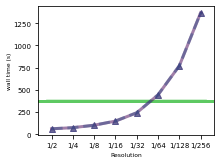

In [32]:
x = [4,8,12,16,20,24,28,32]
l=3 # linewidth
plt.errorbar(x, means, stds, linestyle='-', marker='^',label='droop',color=colors[0],alpha=0.5,linewidth=l)
eq=plt.errorbar(x, means_e, stds_e, linestyle='dashed', marker='^',label='equal',color=colors[1],alpha=0.5,linewidth=l)
eq[-1][0].set_linestyle('--') # get dashed errorbar for equal model
plt.axhline(y=mean_c,label='continuous',color=colors[3],linewidth=l)
x2 = [3,4,8,12,16,20,24,28,32,33]
plt.fill_between(x2,y1=mean_c-std_c,y2=mean_c+std_c,alpha=0.2,color=colors[3])
#plt.legend()
plt.xticks(x,('1/2','1/4','1/8','1/16','1/32','1/64','1/128','1/256'))
plt.xlabel('Resolution',fontsize=6)
plt.ylabel('wall time (s)',fontsize=6, labelpad=1)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.savefig(r'{}\wall_time_brunel.pdf'.format(fig_path),bbox_inches='tight')

plt.show();

## py time

In [52]:
means = []
stds = []
res = [2,4,8,16,32,64,128,256]

for r in res:
    p, s = df_brunel_runtimes.loc['droop','py_time'][r].mean(), df_brunel_runtimes.loc['droop','py_time'][r].std()
    means.append(p)
    stds.append(s)

mean_c, std_c = df_brunel_runtimes.loc['cont','py_time'][8].mean(), df_brunel_runtimes.loc['cont','py_time'][8].std()

means_e = []
stds_e = []

for r in res:
    p, s = df_brunel_runtimes.loc['equal','py_time'][r].mean(), df_brunel_runtimes.loc['equal','py_time'][r].std()
    means_e.append(p)
    stds_e.append(s)


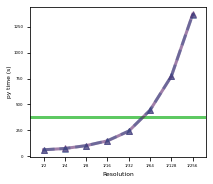

In [53]:
x = [4,8,12,16,20,24,28,32]
l=3 # linewidth
plt.errorbar(x, means, stds, linestyle='-', marker='^',label='droop',color=colors[0],alpha=0.5,linewidth=l)
eq=plt.errorbar(x, means_e, stds_e, linestyle='dashed', marker='^',label='equal',color=colors[1],alpha=0.5,linewidth=l)
eq[-1][0].set_linestyle('--') # get dashed errorbar for equal model
plt.axhline(y=mean_c,label='continuous',color=colors[3],linewidth=l)
x2 = [3,4,8,12,16,20,24,28,32,33]
plt.fill_between(x2,y1=mean_c-std_c,y2=mean_c+std_c,alpha=0.2,color=colors[3])
#plt.legend()
plt.xticks(x,('1/2','1/4','1/8','1/16','1/32','1/64','1/128','1/256'))
plt.xlabel('Resolution',fontsize=6)
plt.ylabel('py time (s)',fontsize=6, labelpad=1)
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.savefig(r'{}\py_time_brunel.pdf'.format(fig_path),bbox_inches='tight')

plt.show();

# Microcircuit

## wall time

In [27]:
means = []
stds = []
res = [8,16,32,64,128,256]

for r in res:
    p, s = df_microcircuit_runtimes.loc['droop','wall_time'][r].mean(), df_microcircuit_runtimes.loc['droop','wall_time'][r].std()
    means.append(p)
    stds.append(s)

mean_c, std_c = df_microcircuit_runtimes.loc['cont','wall_time'][8].mean(), df_microcircuit_runtimes.loc['cont','wall_time'][8].std()

means_e = []
stds_e = []

for r in res:
    p, s = df_microcircuit_runtimes.loc['equal','wall_time'][r].mean(), df_microcircuit_runtimes.loc['equal','wall_time'][r].std()
    means_e.append(p)
    stds_e.append(s)


In [33]:
[x-y for x,y in zip(means,means_e)]

[1.1375417999999975,
 0.1592665000000082,
 -0.2293605999999997,
 0.21743589999999813,
 0.470317199999954,
 -1.6216074999999819]

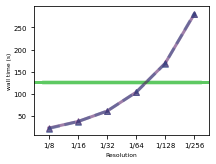

In [34]:
x = [4,8,12,16,20,24]
l=3 # linewidth
plt.errorbar(x, means, stds, linestyle='-', marker='^',label='droop',color=colors[0],alpha=0.5,linewidth=l)
eq=plt.errorbar(x, means_e, stds_e, linestyle='dashed', marker='^',label='equal',color=colors[1],alpha=0.5,linewidth=l)
eq[-1][0].set_linestyle('--') # get dashed errorbar for equal model
plt.axhline(y=mean_c,label='continuous',color=colors[3],linewidth=l)
x2 = [3,4,8,12,16,20,24,25]
plt.fill_between(x2,y1=mean_c-std_c,y2=mean_c+std_c,alpha=0.2,color=colors[3])
#plt.legend()
plt.xticks(x,('1/8','1/16','1/32','1/64','1/128','1/256'))
plt.xlabel('Resolution',fontsize=6)
plt.ylabel('wall time (s)',fontsize=6, labelpad=1)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.savefig(r'{}\wall_time_microcircuit.pdf'.format(fig_path),bbox_inches='tight')

plt.show();

## py time

In [57]:
means = []
stds = []
res = [8,16,32,64,128,256]

for r in res:
    p, s = df_microcircuit_runtimes.loc['droop','py_time'][r].mean(), df_microcircuit_runtimes.loc['droop','py_time'][r].std()
    means.append(p)
    stds.append(s)

mean_c, std_c = df_microcircuit_runtimes.loc['cont','py_time'][8].mean(), df_microcircuit_runtimes.loc['cont','py_time'][8].std()

means_e = []
stds_e = []

for r in res:
    p, s = df_microcircuit_runtimes.loc['equal','py_time'][r].mean(), df_microcircuit_runtimes.loc['equal','py_time'][r].std()
    means_e.append(p)
    stds_e.append(s)


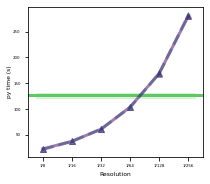

In [58]:
x = [4,8,12,16,20,24]
l=3 # linewidth
plt.errorbar(x, means, stds, linestyle='-', marker='^',label='droop',color=colors[0],alpha=0.5,linewidth=l)
eq=plt.errorbar(x, means_e, stds_e, linestyle='dashed', marker='^',label='equal',color=colors[1],alpha=0.5,linewidth=l)
eq[-1][0].set_linestyle('--') # get dashed errorbar for equal model
plt.axhline(y=mean_c,label='continuous',color=colors[3],linewidth=l)
x2 = [3,4,8,12,16,20,24,25]
plt.fill_between(x2,y1=mean_c-std_c,y2=mean_c+std_c,alpha=0.2,color=colors[3])
#plt.legend()
plt.xticks(x,('1/8','1/16','1/32','1/64','1/128','1/256'))
plt.xlabel('Resolution',fontsize=6)
plt.ylabel('py time (s)',fontsize=6, labelpad=1)
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.savefig(r'{}\py_time_microcircuit.pdf'.format(fig_path),bbox_inches='tight')

plt.show();